In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('kickstarter_projects.csv')

In [3]:
df1=df.copy()

In [4]:
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


In [5]:
#By using the Attributes Launched and Deadline we are adding a Duration_in_days attribute.

In [6]:
df['Launched'] = pd.to_datetime(df['Launched'], format='%Y-%m-%d %H:%M:%S')
df['Deadline'] = pd.to_datetime(df['Deadline'], format='%Y-%m-%d')
df['Duration_in_Days'] = (df['Deadline'] - df['Launched']).dt.days

In [7]:
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Duration_in_Days
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,39
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,87
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,8
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,79
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,28


In [8]:
df.describe()

,ID,Goal,Pledged,Backers,Duration_in_Days
count,3.748530e+05,3.748530e+05,3.748530e+05,374853.000000,374853.000000
mean,1.074656e+09,4.586378e+04,9.121073e+03,106.690359,33.217192
std,6.191377e+08,1.158778e+06,9.132054e+04,911.718520,12.804795
min,5.971000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,5.380728e+08,2.000000e+03,3.100000e+01,2.000000,29.000000
50%,1.075300e+09,5.500000e+03,6.250000e+02,12.000000,29.000000
75%,1.610149e+09,1.600000e+04,4.051000e+03,57.000000,36.000000
max,2.147476e+09,1.663614e+08,2.033899e+07,219382.000000,91.000000


In [9]:
#shape of the dataset
df.shape

(374853, 12)

In [10]:
#Data types of each column
df.dtypes

ID                           int64
Name                        object
Category                    object
Subcategory                 object
Country                     object
Launched            datetime64[ns]
Deadline            datetime64[ns]
Goal                         int64
Pledged                      int64
Backers                      int64
State                       object
Duration_in_Days             int64
dtype: object

In [11]:
# Check the number of missing values in each column
print(df.isnull().sum())

ID                  0
Name                0
Category            0
Subcategory         0
Country             0
Launched            0
Deadline            0
Goal                0
Pledged             0
Backers             0
State               0
Duration_in_Days    0
dtype: int64


In [12]:
#The dataset do not have any missing values so it doesn't lead to biased or inaccurate analysis and modeling.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                374853 non-null  int64         
 1   Name              374853 non-null  object        
 2   Category          374853 non-null  object        
 3   Subcategory       374853 non-null  object        
 4   Country           374853 non-null  object        
 5   Launched          374853 non-null  datetime64[ns]
 6   Deadline          374853 non-null  datetime64[ns]
 7   Goal              374853 non-null  int64         
 8   Pledged           374853 non-null  int64         
 9   Backers           374853 non-null  int64         
 10  State             374853 non-null  object        
 11  Duration_in_Days  374853 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 34.3+ MB


In [14]:
df1=df1.head(100000)

/tmp/ipykernel_15625/3672011705.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr()


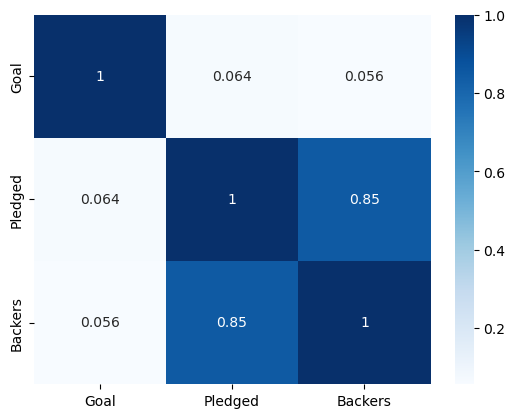

In [15]:
#Correlation between Goal, Pledged and Backers
df2 = df1.drop("ID", axis=1)
corr = df2.corr()

# heatmap 
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

In [16]:
#How many projects were successful and how many failed?What is the overall success rate of Kickstarter projects?

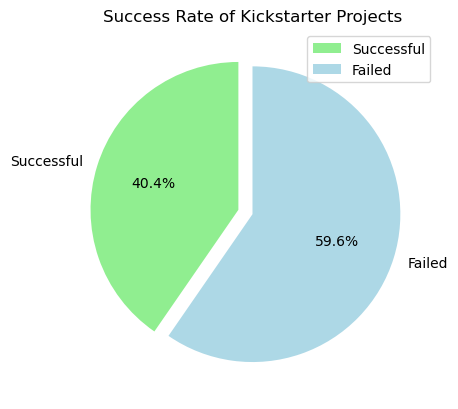

In [17]:
#Success Rate
success_rate = df["State"].value_counts(normalize=True)["Successful"]
failure_rate = df["State"].value_counts(normalize=True)["Failed"]

# Create a pie chart
labels = ["Successful", "Failed"]
sizes = [success_rate, failure_rate]
colors = ["lightgreen", "lightblue"]
explode = (0.1, 0)  # explode the "Successful" slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
plt.title("Success Rate of Kickstarter Projects")
plt.legend(labels, loc="best")

plt.show()

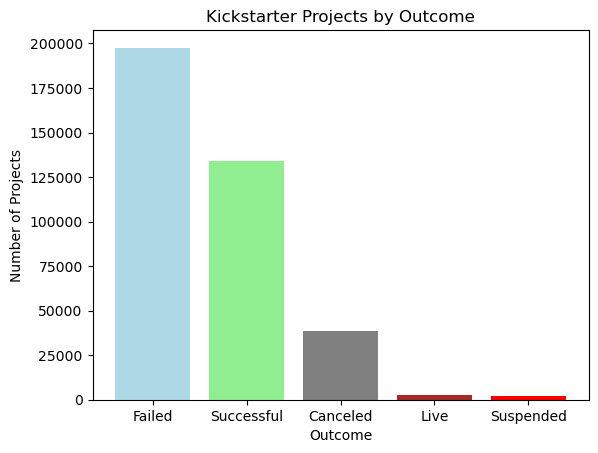

In [18]:
# Count the number of projects by state

data = df["State"].value_counts()
#  bar chart
plt.bar(data.index, data.values, color=["lightblue", "lightgreen", "gray","brown","red"])
plt.title("Kickstarter Projects by Outcome")
plt.xlabel("Outcome")
plt.ylabel("Number of Projects")
plt.show()


In [19]:
#Count of number of projects by category by WordCloud Visualization

In [20]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Note: you may need to restart the kernel to use updated packages.


In [21]:
from wordcloud import WordCloud

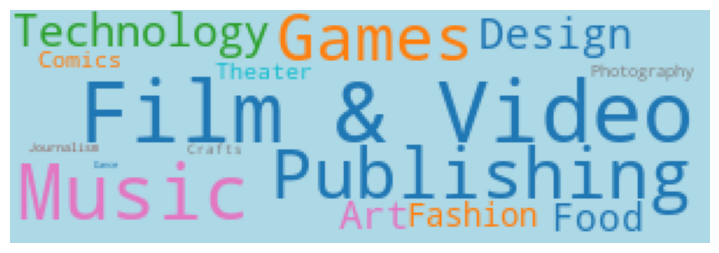

In [22]:
data = df["Category"].value_counts()

wordcloud = WordCloud(width=300, height=100, background_color="lightblue", colormap="tab10").generate_from_frequencies(data)

plt.figure(figsize=(7, 7), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [23]:
# Outliers for Goal, Pledged and Backers Fields

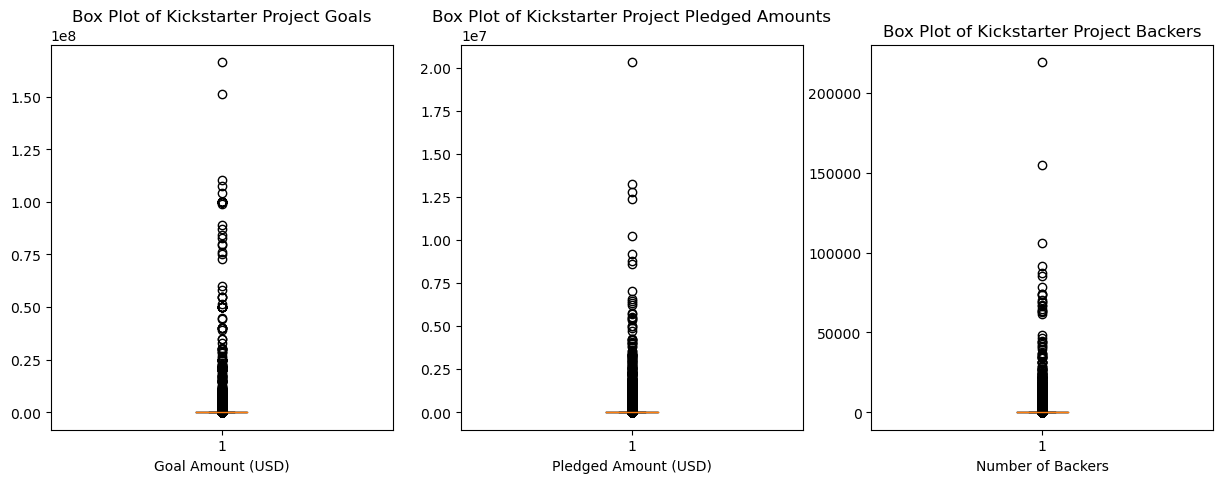

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# horizontal box plot for the "Goal" attribute
axes[0].boxplot(df["Goal"], vert=True)
axes[0].set_title("Box Plot of Kickstarter Project Goals")
axes[0].set_xlabel("Goal Amount (USD)")

# horizontal box plot for the "Pledged" attribute
axes[1].boxplot(df["Pledged"], vert=True)
axes[1].set_title("Box Plot of Kickstarter Project Pledged Amounts")
axes[1].set_xlabel("Pledged Amount (USD)")

# horizontal box plot for the "Backers" attribute
axes[2].boxplot(df["Backers"], vert=True)
axes[2].set_title("Box Plot of Kickstarter Project Backers")
axes[2].set_xlabel("Number of Backers")

plt.show()

In [25]:
## How many projects were launched for each category

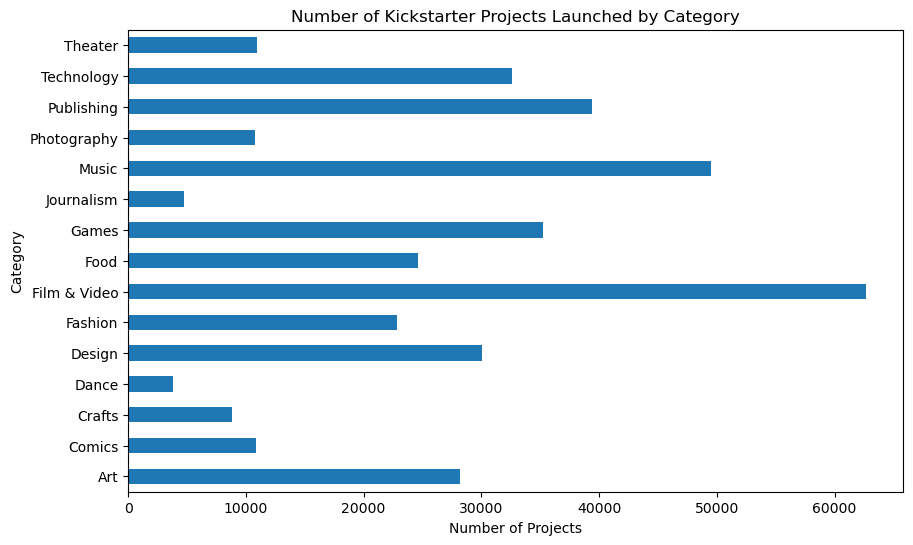

In [28]:
import matplotlib.pyplot as plt

# horizontal bar chart of the category counts
fig, ax = plt.subplots(figsize=(10, 6))
category_counts = df.groupby("Category")["ID"].count()
category_counts.plot(kind="barh", ax=ax)

ax.set_title("Number of Kickstarter Projects Launched by Category")
ax.set_xlabel("Number of Projects")
ax.set_ylabel("Category")
plt.show()

In [27]:
#What is the overall trend of crowdfunding projects over time,and how does this vary across different categories?

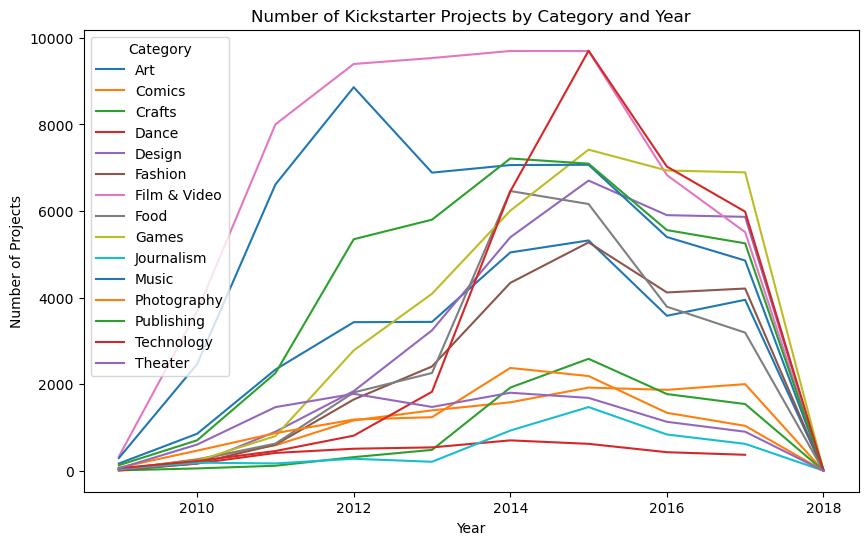

In [29]:
import matplotlib.pyplot as plt

df["Launched"] = pd.to_datetime(df["Launched"])
df["Deadline"] = pd.to_datetime(df["Deadline"])

df["Year"] = df["Launched"].dt.year

category_year_counts = df.groupby(["Category", "Year"])["ID"].count()

pivot_table = category_year_counts.unstack(level=0)

fig, ax = plt.subplots(figsize=(10, 6))
pivot_table.plot(kind="line", ax=ax)

ax.set_title("Number of Kickstarter Projects by Category and Year")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Projects")

plt.show()


In [30]:
#Project Outcome by Duration Range

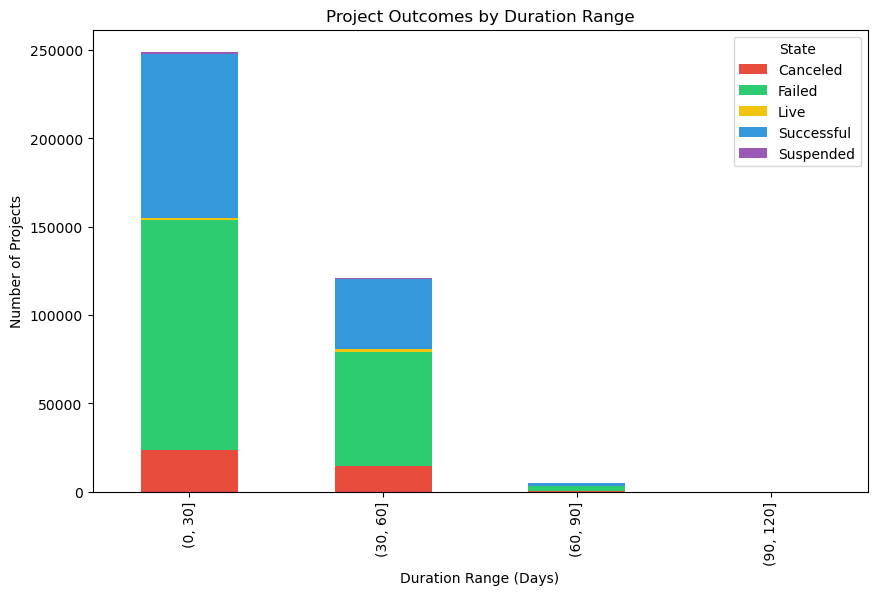

In [31]:
df["Duration_in_Days"] = (pd.to_datetime(df["Deadline"]) - pd.to_datetime(df["Launched"])).dt.days

duration_bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450, 480, 510, 540, 570, 600]

df["Duration_Range"] = pd.cut(df["Duration_in_Days"], bins=duration_bins)

duration_state_counts = pd.crosstab(df["Duration_Range"], df["State"])

colors = ["#E74C3C", "#2ECC71", "#F1C40F", "#3498DB", "#9B59B6", "#34495E"]

duration_state_counts.plot(kind="bar", stacked=True, figsize=(10,6), color=colors)

plt.title("Project Outcomes by Duration Range")
plt.xlabel("Duration Range (Days)")
plt.ylabel("Number of Projects")

plt.show()
